# Importo datos

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

df=pd.read_excel("default of credit card clients.xls")

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [104]:
#Elimino la primera fila

df = df.drop(df.index[0])
df = df.drop(df.columns[0], axis=1)
df.reset_index(drop=True, inplace=True)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Columnas y su significado

*X1: Credito dado en Nuevos Dolares Taiwaneses.*

*X2: Genero: 1 = masculino, 2 = femenino.*

*X3: Educación: 1 = Postgrado, 2 = Universitario, 3 = Bachillerato, 4 = otro.*

*X4: Estado marital: 1 = casado/a, 2 = soltero/a, 3 = otro.*

*X5: Edad en años.*

*X6 - X11: Estado de la deuda entre Abril y Septiembre 2005. X6 corresponde a Septiembre 2005 y X11 corresponde a Abril 2005. Los valores hacen referencia a: Pagado = -1, Pago atrasado 1 mes = 1, Pago atrasado 2 meses = 2, .... , Pago atrasado 8 meses = 8, Pago atrasado 9 meses o más = 9.*

*X12 - X17: Saldo pendiente por pagar en Nuevos Dolares Taiwaneses. X12 corresponde a Septiembre 2005 y X17 corresponde a Abril 2005.*

*X18 - X23: Pago de deuda en un mes en Nuevos Dolares Taiwabeses. X18 corresponde al pago en el mes de Septiembre 2005 y X23 corresponde al pago en el mes de Abril 2005.*

*Y: Variable de respuesta donde se determina si un pago hace "default" el proximo mes. Toma el valor de 1 si el pago hace default, 0 si no hace default.*


# Revision de datos nulos

In [105]:
valores_nulos = df.isnull().sum()

print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


# Dispersión de datos

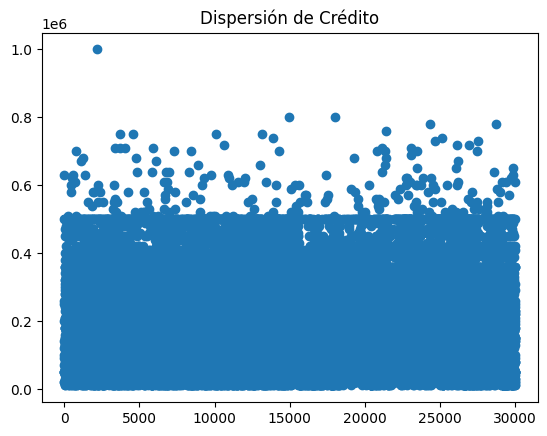

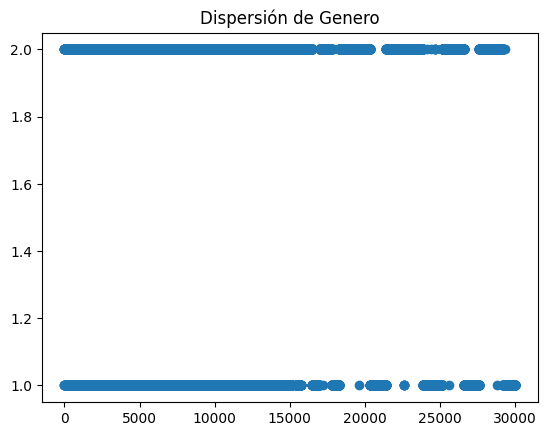

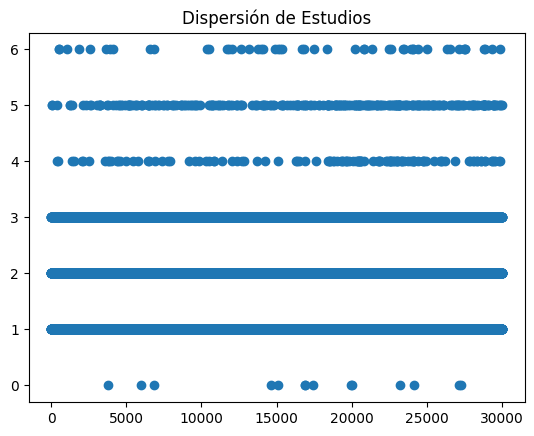

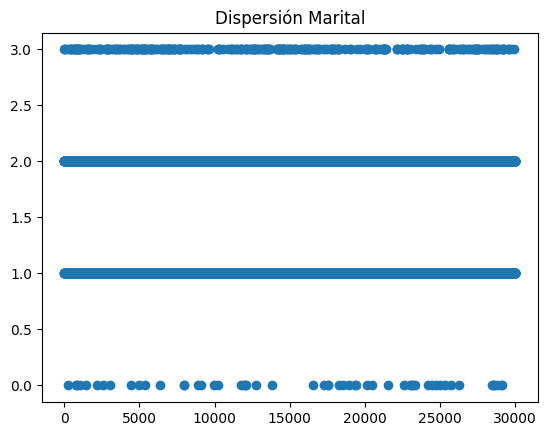

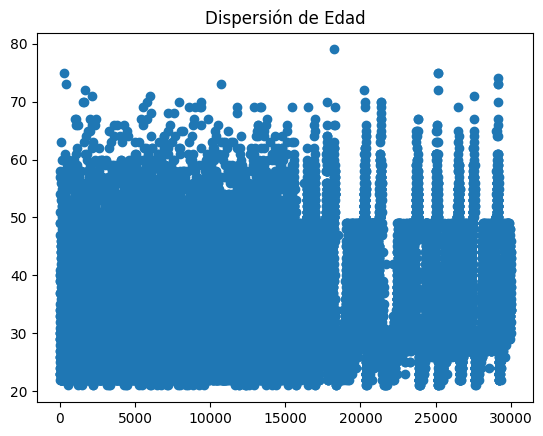

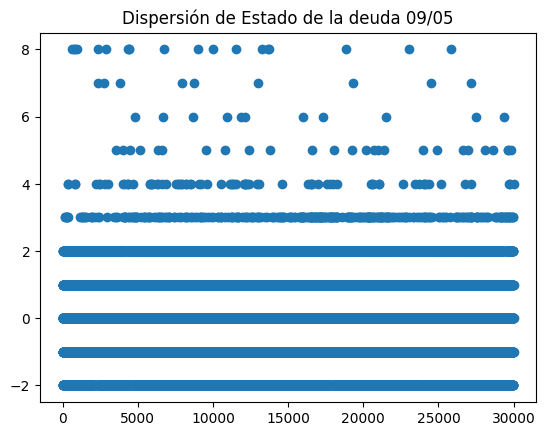

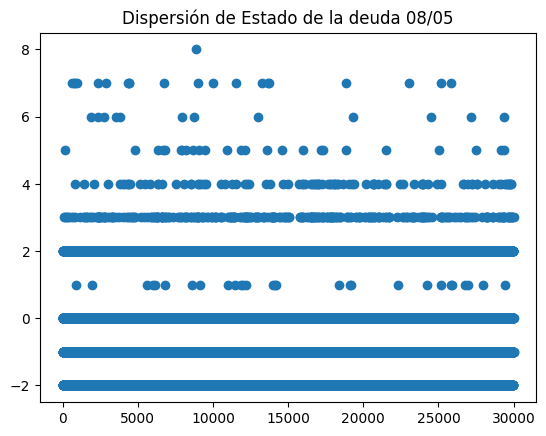

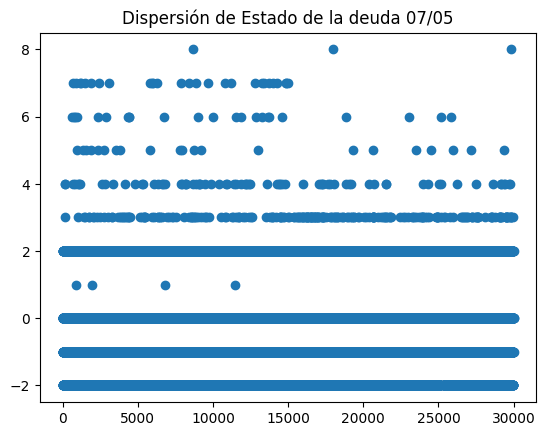

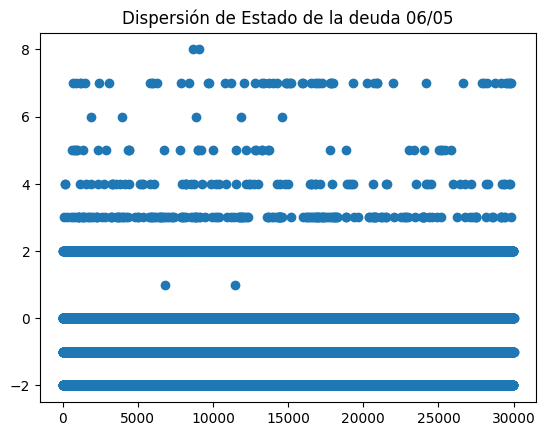

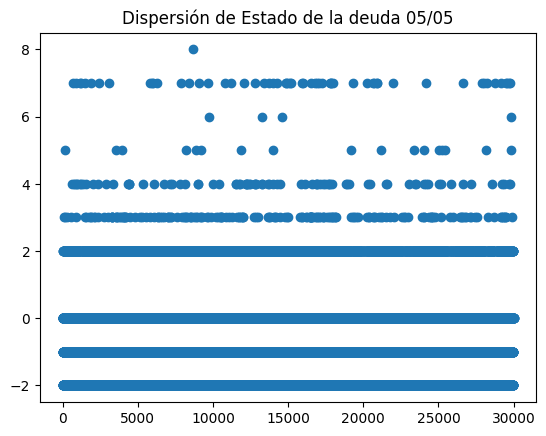

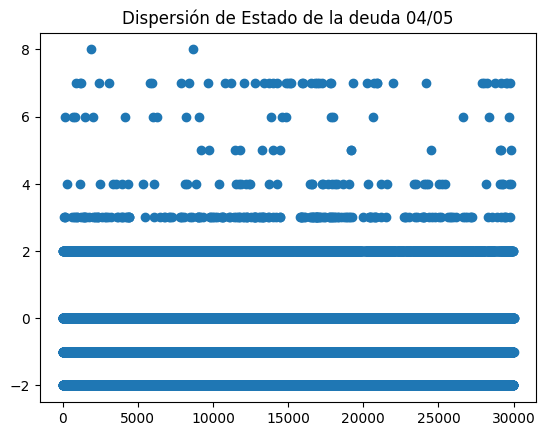

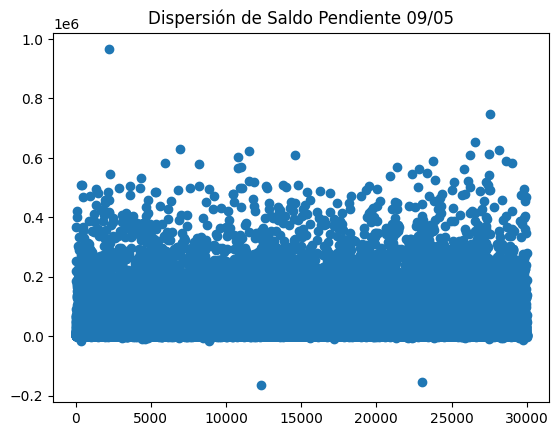

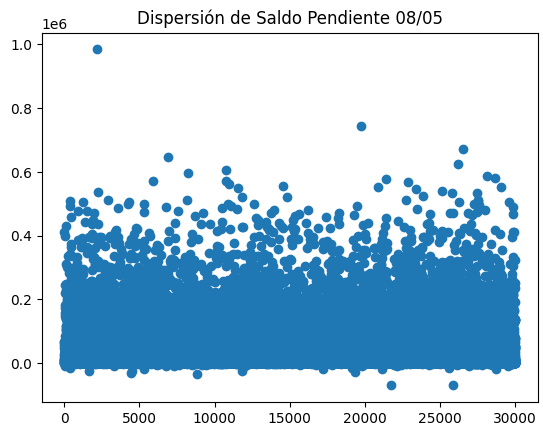

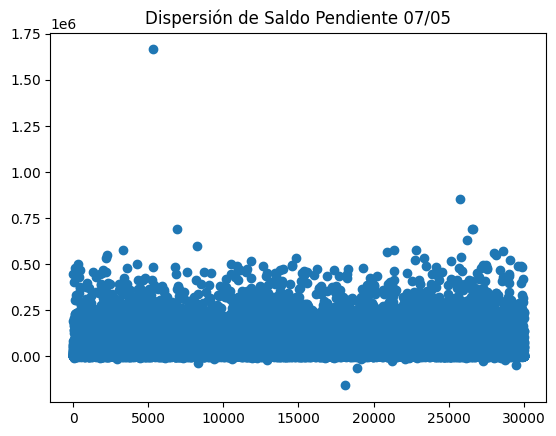

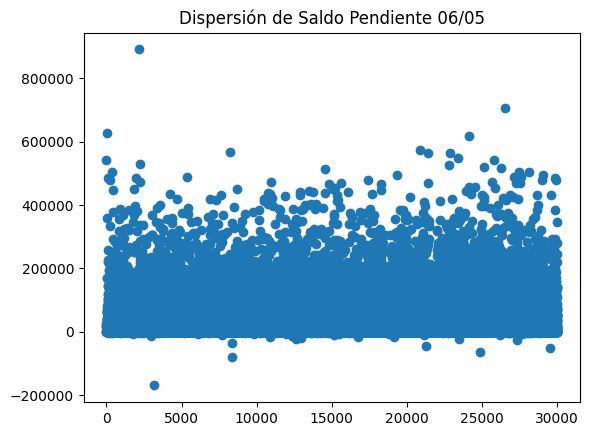

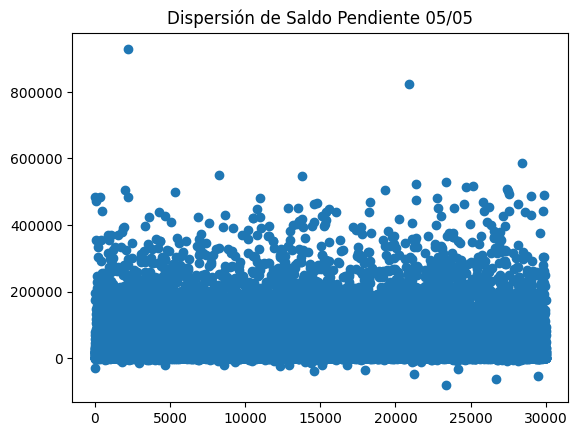

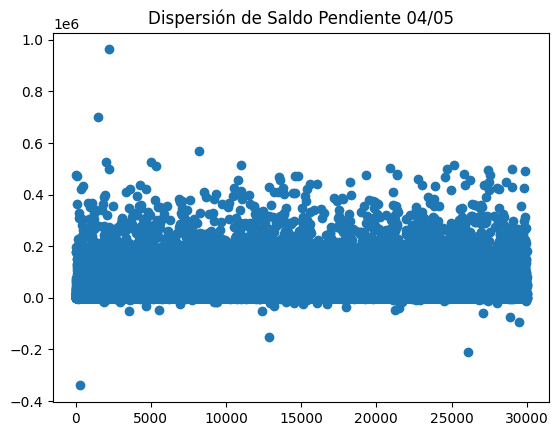

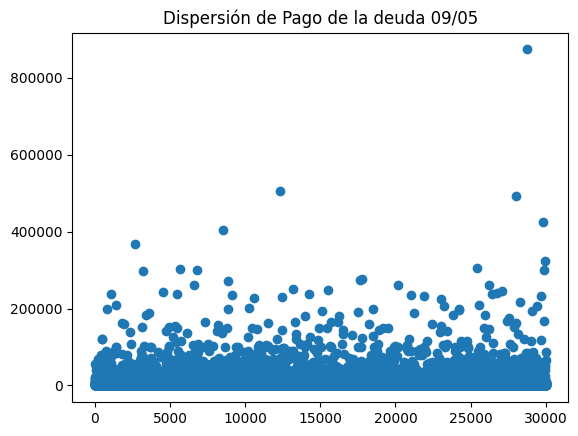

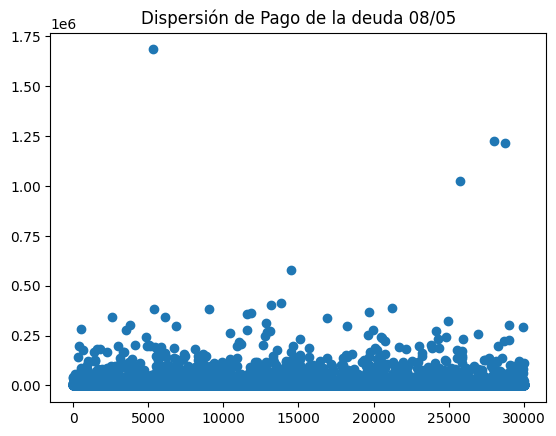

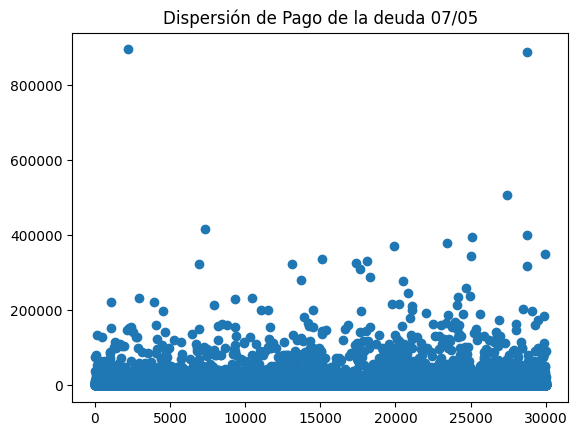

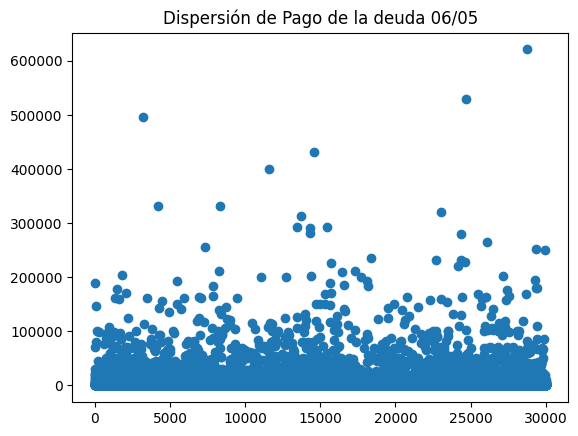

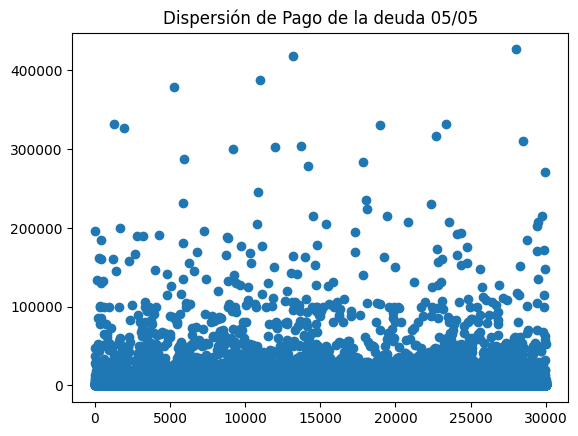

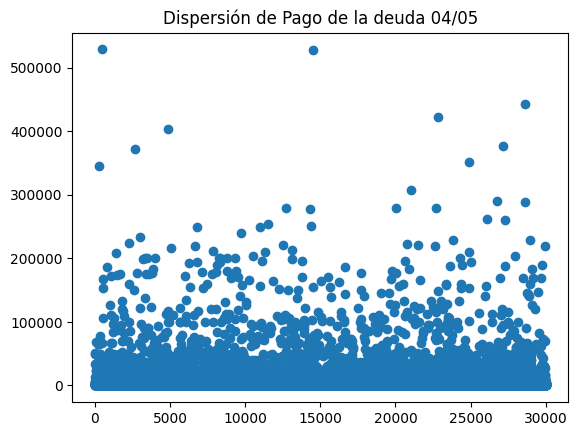

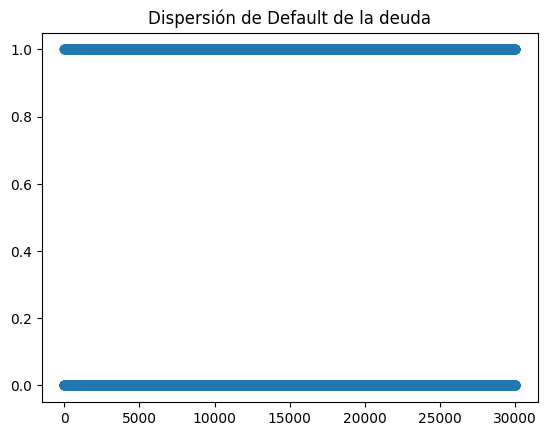

In [106]:
valorx = range(1, len(df)+1)

plt.scatter(valorx,df['X1'])
plt.title("Dispersión de Crédito")
plt.show()

plt.scatter(valorx,df['X2'])
plt.title("Dispersión de Genero")
plt.show()

plt.scatter(valorx,df['X3'])
plt.title("Dispersión de Estudios")
plt.show()

plt.scatter(valorx,df['X4'])
plt.title("Dispersión Marital")
plt.show()

plt.scatter(valorx,df['X5'])
plt.title("Dispersión de Edad")
plt.show()

plt.scatter(valorx,df['X6'])
plt.title("Dispersión de Estado de la deuda 09/05")
plt.show()

plt.scatter(valorx,df['X7'])
plt.title("Dispersión de Estado de la deuda 08/05")
plt.show()

plt.scatter(valorx,df['X8'])
plt.title("Dispersión de Estado de la deuda 07/05")
plt.show()

plt.scatter(valorx,df['X9'])
plt.title("Dispersión de Estado de la deuda 06/05")
plt.show()

plt.scatter(valorx,df['X10'])
plt.title("Dispersión de Estado de la deuda 05/05")
plt.show()

plt.scatter(valorx,df['X11'])
plt.title("Dispersión de Estado de la deuda 04/05")
plt.show()

plt.scatter(valorx,df['X12'])
plt.title("Dispersión de Saldo Pendiente 09/05")
plt.show()

plt.scatter(valorx,df['X13'])
plt.title("Dispersión de Saldo Pendiente 08/05")
plt.show()

plt.scatter(valorx,df['X14'])
plt.title("Dispersión de Saldo Pendiente 07/05")
plt.show()

plt.scatter(valorx,df['X15'])
plt.title("Dispersión de Saldo Pendiente 06/05")
plt.show()

plt.scatter(valorx,df['X16'])
plt.title("Dispersión de Saldo Pendiente 05/05")
plt.show()

plt.scatter(valorx,df['X17'])
plt.title("Dispersión de Saldo Pendiente 04/05")
plt.show()

plt.scatter(valorx,df['X18'])
plt.title("Dispersión de Pago de la deuda 09/05")
plt.show()

plt.scatter(valorx,df['X19'])
plt.title("Dispersión de Pago de la deuda 08/05")
plt.show()

plt.scatter(valorx,df['X20'])
plt.title("Dispersión de Pago de la deuda 07/05")
plt.show()

plt.scatter(valorx,df['X21'])
plt.title("Dispersión de Pago de la deuda 06/05")
plt.show()

plt.scatter(valorx,df['X22'])
plt.title("Dispersión de Pago de la deuda 05/05")
plt.show()

plt.scatter(valorx,df['X23'])
plt.title("Dispersión de Pago de la deuda 04/05")
plt.show()

plt.scatter(valorx,df['Y'])
plt.title("Dispersión de Default de la deuda")
plt.show()




# Limpieza de datos

## Eliminación datos con estado de estudios anormal

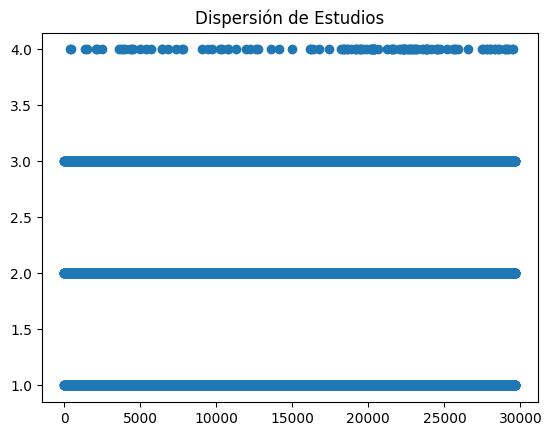

(29655, 24)

In [107]:
valores_validos_educacion = [1,2,3,4]
df = df[df['X3'].isin(valores_validos_educacion)]
df.reset_index(drop=True, inplace=True)


valorx = range(1, len(df)+1)
plt.scatter(valorx,df['X3'])
plt.title("Dispersión de Estudios")
plt.show()

df.shape

## Eliminación de datos con estado marital anormal

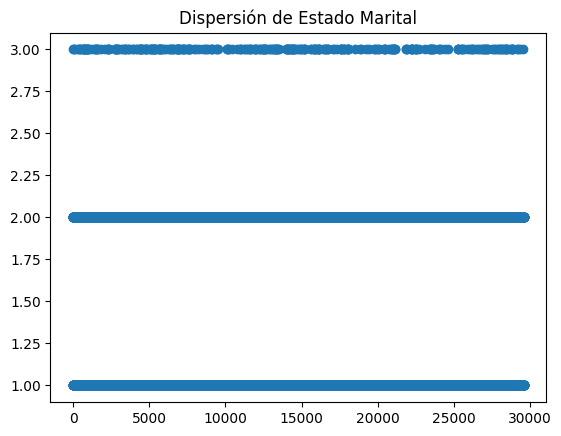

(29601, 24)

In [108]:
valores_validos_marital = [1,2,3]
df = df[df['X4'].isin(valores_validos_marital)]
df.reset_index(drop=True, inplace=True)


valorx = range(1, len(df)+1)
plt.scatter(valorx,df['X4'])
plt.title("Dispersión de Estado Marital")
plt.show()

df.shape

## Eliminacion datos de Saldo Negativo

In [110]:
df_nuevo = df[df['X12'] >= 0]
df_nuevo = df_nuevo[df_nuevo['X13'] >= 0]
df_nuevo = df_nuevo[df_nuevo['X14'] >= 0]
df_nuevo = df_nuevo[df_nuevo['X15'] >= 0]
df_nuevo = df_nuevo[df_nuevo['X16'] >= 0]
df_nuevo = df_nuevo[df_nuevo['X17'] >= 0]
df_nuevo.reset_index(drop=True, inplace=True)

df_nuevo.shape

(27692, 24)

## Adecuacion datos Estado de la deuda

In [113]:
for index, row in df_nuevo.iterrows():
    if row['X12'] <= 0:
        df_nuevo.at[index, 'X6'] = -1
    if row['X13'] <= 0:
        df_nuevo.at[index, 'X7'] = -1
    if row['X14'] <= 0:
        df_nuevo.at[index, 'X8'] = -1
    if row['X15'] <= 0:
        df_nuevo.at[index, 'X9'] = -1
    if row['X16'] <= 0:
        df_nuevo.at[index, 'X10'] = -1
    if row['X17'] <= 0:
        df_nuevo.at[index, 'X11'] = -1
    if row['X6'] == 0:
        df_nuevo.at[index, 'X6'] = -1
    if row['X7'] == 0:
        df_nuevo.at[index, 'X7'] = -1
    if row['X8'] == 0:
        df_nuevo.at[index, 'X8'] = -1
    if row['X9'] == 0:
        df_nuevo.at[index, 'X9'] = -1
    if row['X10'] == 0:
        df_nuevo.at[index, 'X10'] = -1
    if row['X11'] == 0:
        df_nuevo.at[index, 'X11'] = -1

df_nuevo.shape


(27692, 24)

In [115]:
valores_validos_Estado_Deuda = [-1,1,2,3,4,5,6,7,8,9]
df_final = df_nuevo[df_nuevo['X6'].isin(valores_validos_Estado_Deuda)]
df_final = df_final[df_final['X7'].isin(valores_validos_Estado_Deuda)]
df_final = df_final[df_final['X8'].isin(valores_validos_Estado_Deuda)]
df_final = df_final[df_final['X9'].isin(valores_validos_Estado_Deuda)]
df_final = df_final[df_final['X10'].isin(valores_validos_Estado_Deuda)]
df_final = df_final[df_final['X11'].isin(valores_validos_Estado_Deuda)]
df_final.reset_index(drop=True, inplace=True)


df_final.shape

(25583, 24)

# Creación colmnas nuevas

In [120]:
df_final['X24'] = (df_final['X18'] > 0).astype(int)
df_final['X25'] = (df_final['X19'] > 0).astype(int)
df_final['X26'] = (df_final['X20'] > 0).astype(int)
df_final['X27'] = (df_final['X21'] > 0).astype(int)
df_final['X28'] = (df_final['X22'] > 0).astype(int)
df_final['X29'] = (df_final['X23'] > 0).astype(int)

df_final=df_final[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','Y']]

df_final.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,Y
0,20000,2,2,1,24,2,2,-1,-1,-1,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,2,2,26,-1,2,-1,-1,-1,...,1000,0,2000,0,1,1,1,0,1,1
2,90000,2,2,2,34,-1,-1,-1,-1,-1,...,1000,1000,5000,1,1,1,1,1,1,0
3,50000,2,2,1,37,-1,-1,-1,-1,-1,...,1100,1069,1000,1,1,1,1,1,1,0
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,9000,689,679,1,1,1,1,1,1,0


Significado Columnas nuevas

*X24 - X29: Toma un valor de 1 si en dicho mes se realizo un pago y 0 si no se realizo un pago. X24 corresponde a Septiembre 2005 y X29 corresponde a Abril 2005.*


# Revision Dispersión Final

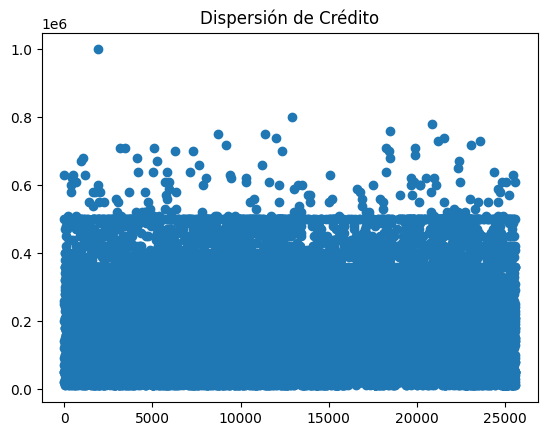

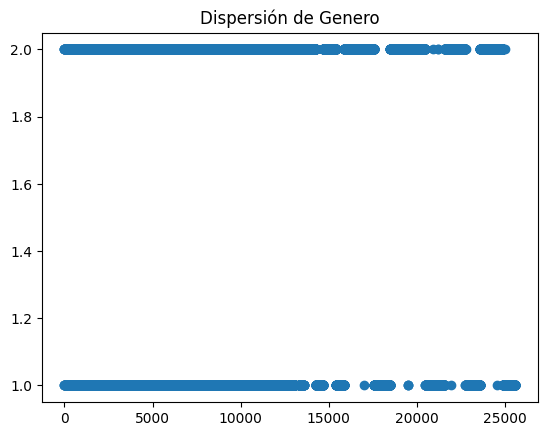

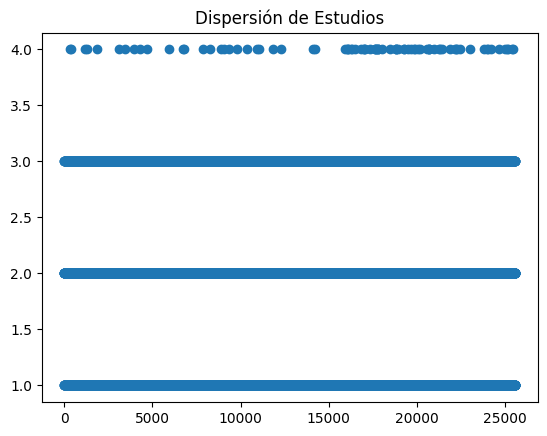

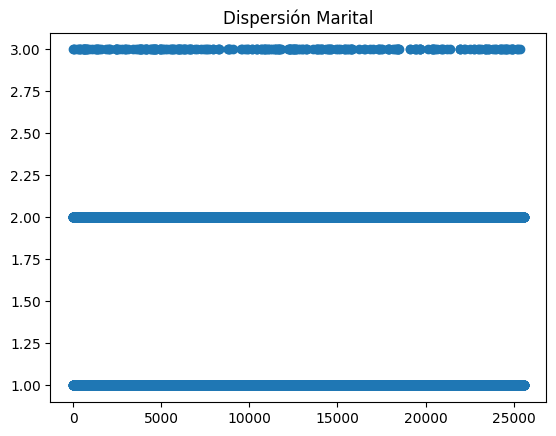

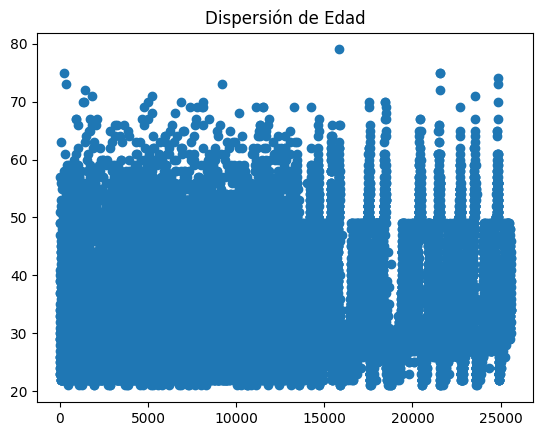

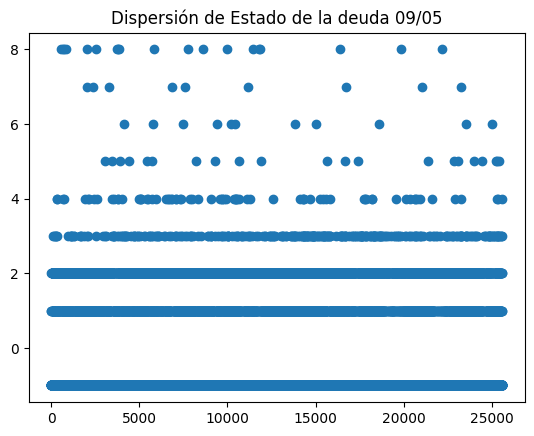

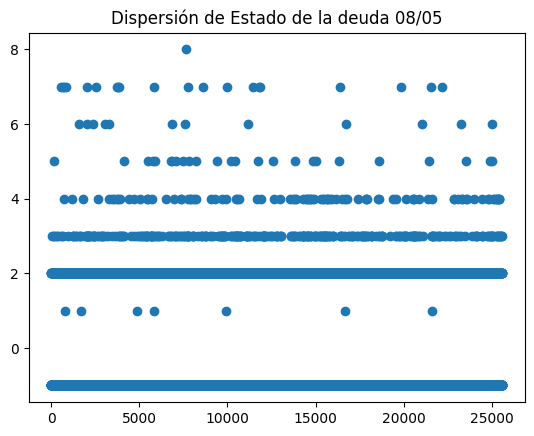

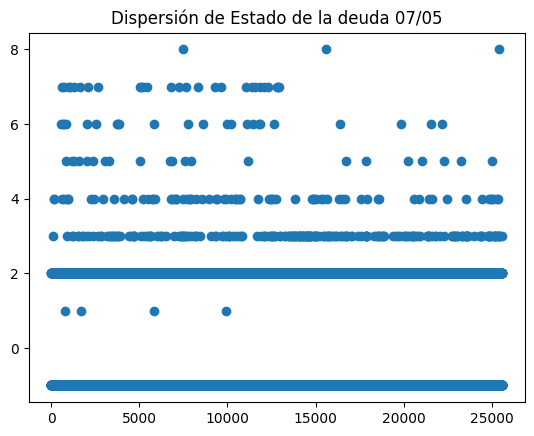

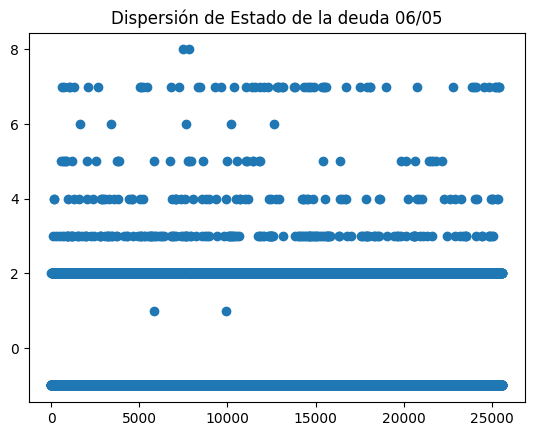

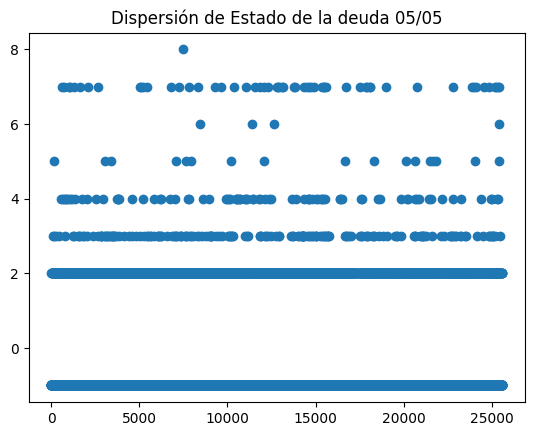

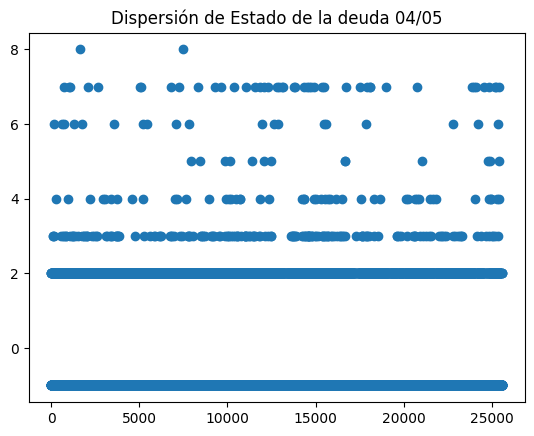

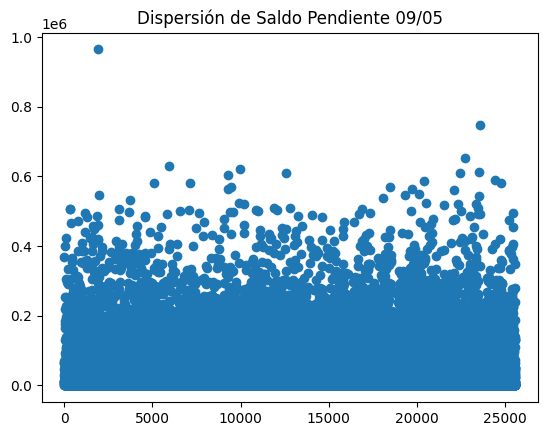

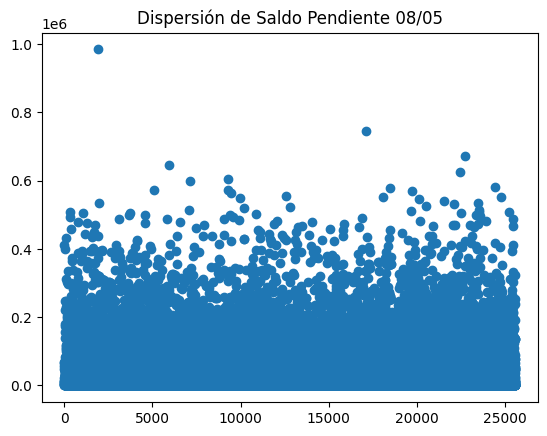

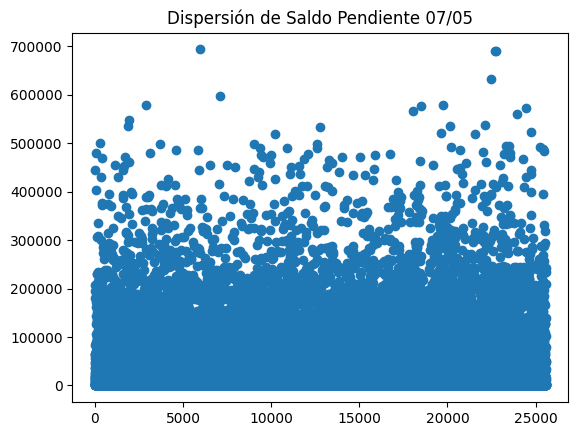

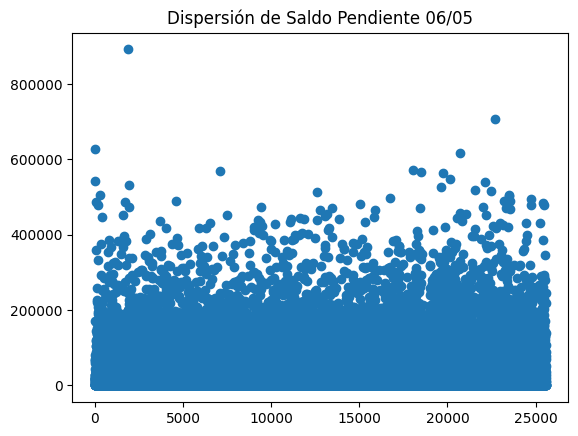

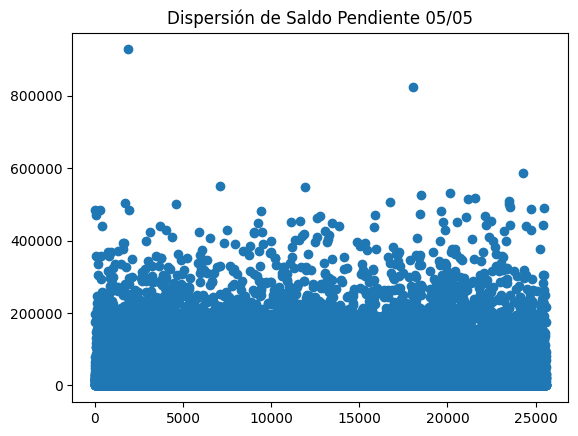

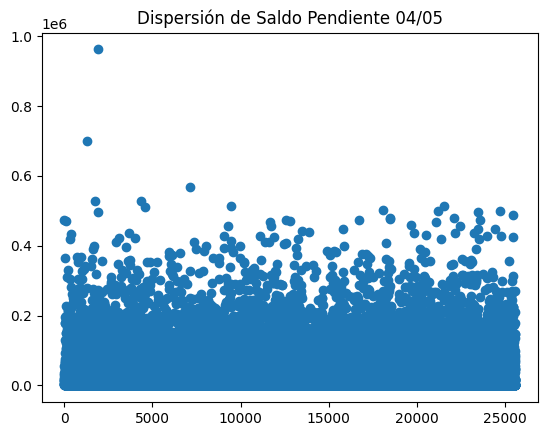

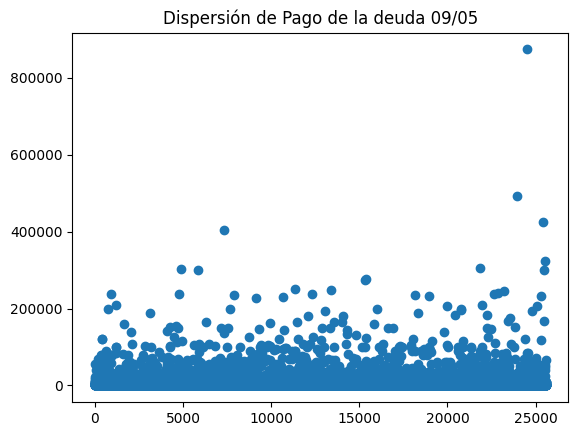

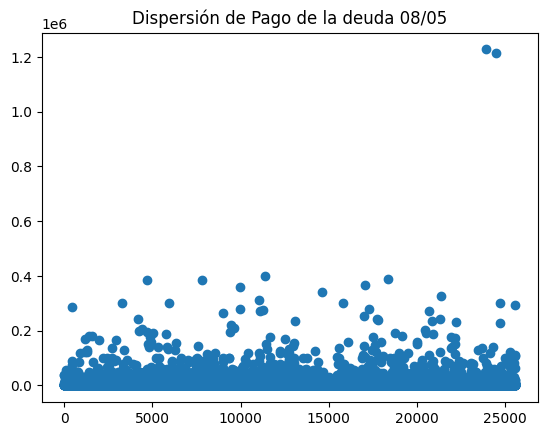

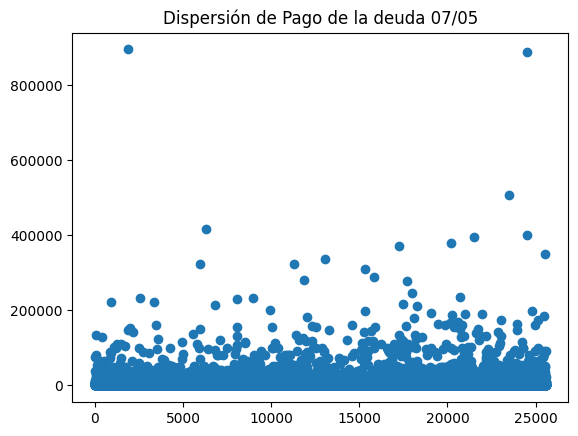

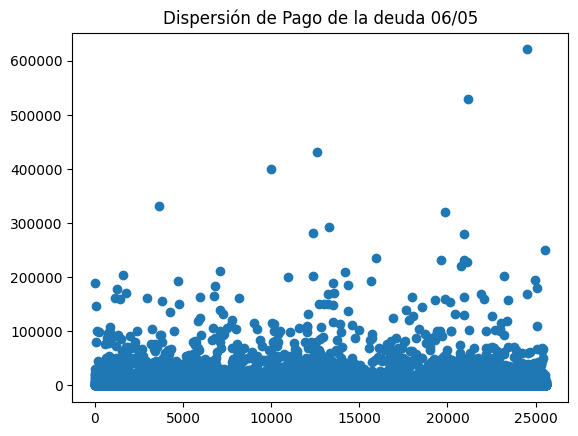

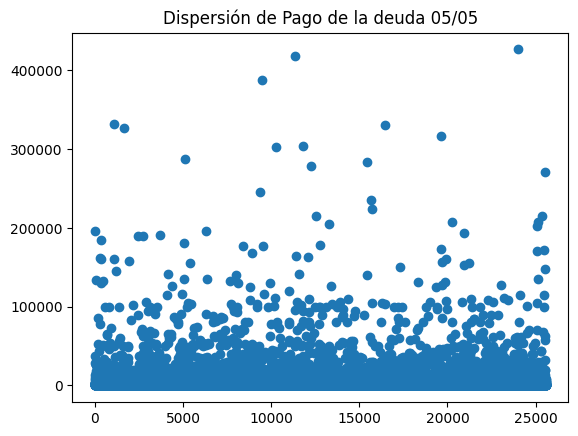

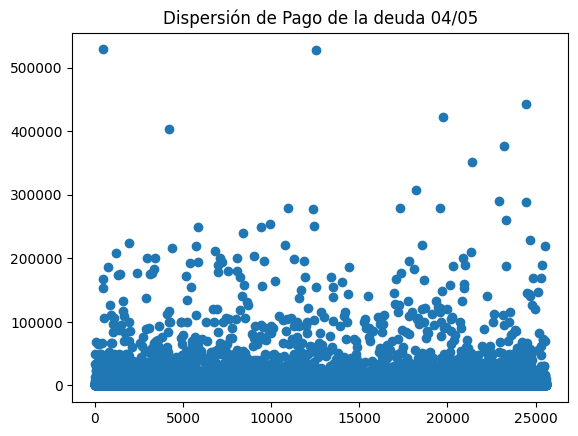

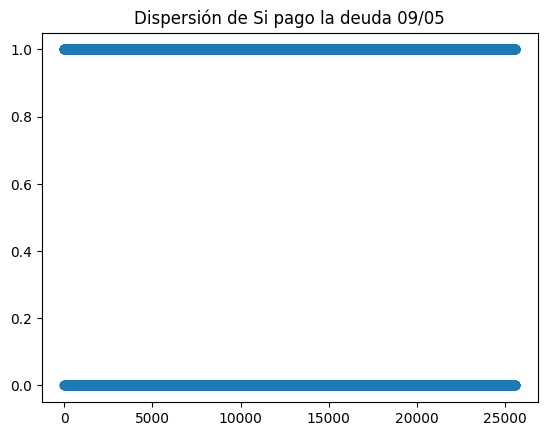

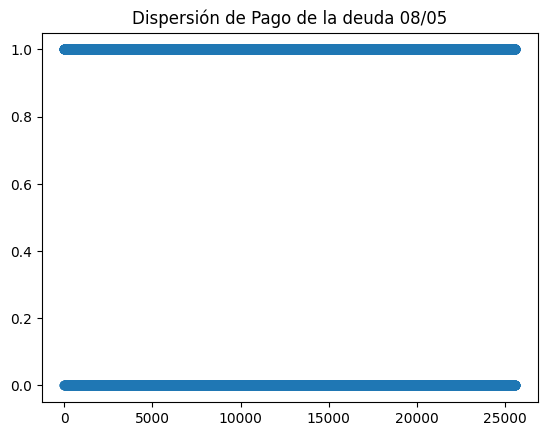

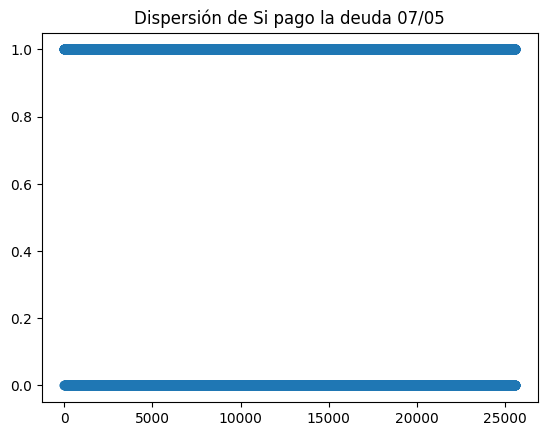

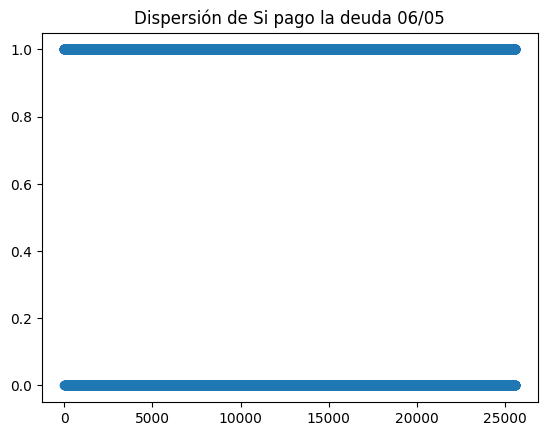

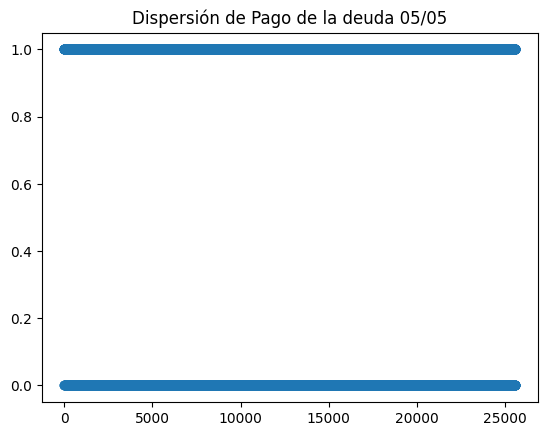

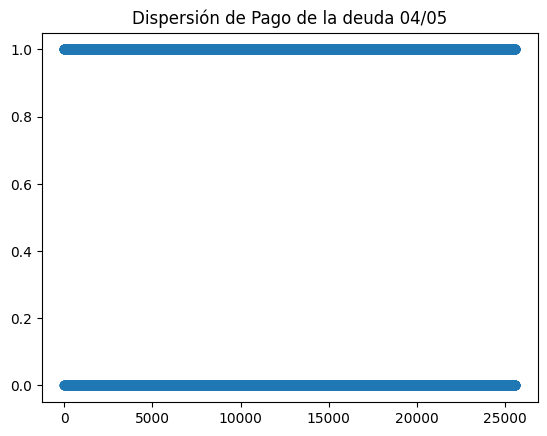

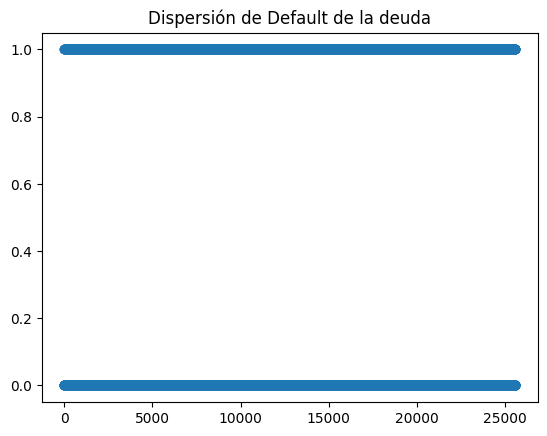

In [121]:
valorx = range(1, len(df_final)+1)

plt.scatter(valorx, df_final['X1'])
plt.title("Dispersión de Crédito")
plt.show()

plt.scatter(valorx, df_final['X2'])
plt.title("Dispersión de Genero")
plt.show()

plt.scatter(valorx, df_final['X3'])
plt.title("Dispersión de Estudios")
plt.show()

plt.scatter(valorx, df_final['X4'])
plt.title("Dispersión Marital")
plt.show()

plt.scatter(valorx, df_final['X5'])
plt.title("Dispersión de Edad")
plt.show()

plt.scatter(valorx, df_final['X6'])
plt.title("Dispersión de Estado de la deuda 09/05")
plt.show()

plt.scatter(valorx, df_final['X7'])
plt.title("Dispersión de Estado de la deuda 08/05")
plt.show()

plt.scatter(valorx, df_final['X8'])
plt.title("Dispersión de Estado de la deuda 07/05")
plt.show()

plt.scatter(valorx, df_final['X9'])
plt.title("Dispersión de Estado de la deuda 06/05")
plt.show()

plt.scatter(valorx, df_final['X10'])
plt.title("Dispersión de Estado de la deuda 05/05")
plt.show()

plt.scatter(valorx, df_final['X11'])
plt.title("Dispersión de Estado de la deuda 04/05")
plt.show()

plt.scatter(valorx, df_final['X12'])
plt.title("Dispersión de Saldo Pendiente 09/05")
plt.show()

plt.scatter(valorx, df_final['X13'])
plt.title("Dispersión de Saldo Pendiente 08/05")
plt.show()

plt.scatter(valorx, df_final['X14'])
plt.title("Dispersión de Saldo Pendiente 07/05")
plt.show()

plt.scatter(valorx, df_final['X15'])
plt.title("Dispersión de Saldo Pendiente 06/05")
plt.show()

plt.scatter(valorx, df_final['X16'])
plt.title("Dispersión de Saldo Pendiente 05/05")
plt.show()

plt.scatter(valorx, df_final['X17'])
plt.title("Dispersión de Saldo Pendiente 04/05")
plt.show()

plt.scatter(valorx, df_final['X18'])
plt.title("Dispersión de Pago de la deuda 09/05")
plt.show()

plt.scatter(valorx, df_final['X19'])
plt.title("Dispersión de Pago de la deuda 08/05")
plt.show()

plt.scatter(valorx, df_final['X20'])
plt.title("Dispersión de Pago de la deuda 07/05")
plt.show()

plt.scatter(valorx, df_final['X21'])
plt.title("Dispersión de Pago de la deuda 06/05")
plt.show()

plt.scatter(valorx, df_final['X22'])
plt.title("Dispersión de Pago de la deuda 05/05")
plt.show()

plt.scatter(valorx, df_final['X23'])
plt.title("Dispersión de Pago de la deuda 04/05")
plt.show()

plt.scatter(valorx, df_final['X24'])
plt.title("Dispersión de Si pago la deuda 09/05")
plt.show()

plt.scatter(valorx, df_final['X25'])
plt.title("Dispersión de Pago de la deuda 08/05")
plt.show()

plt.scatter(valorx, df_final['X26'])
plt.title("Dispersión de Si pago la deuda 07/05")
plt.show()

plt.scatter(valorx, df_final['X27'])
plt.title("Dispersión de Si pago la deuda 06/05")
plt.show()

plt.scatter(valorx, df_final['X28'])
plt.title("Dispersión de Pago de la deuda 05/05")
plt.show()

plt.scatter(valorx, df_final['X29'])
plt.title("Dispersión de Pago de la deuda 04/05")
plt.show()

plt.scatter(valorx, df_final['Y'])
plt.title("Dispersión de Default de la deuda")
plt.show()


# Escribir archivo de datos

In [122]:
df_final.to_csv("DataFrameFinal.csv",index=False,encoding="utf-8")